In [34]:
from sympy import symbols, cos, sin
import matplotlib.pyplot as plt
from sympy import *
import numpy as np
import scipy.optimize as sc
init_printing(use_unicode=True)
n1 = Symbol('n_1')
n2 = Symbol('n_2')
w = Symbol('w')
d = Symbol('d')
c = Symbol('c')
nu = Symbol(r'nu')
kp = Symbol('k_||')
# w=2*pi*nu
# k0 = w/c
k0= Symbol('k_0')
k1 = k0 * n1
kz1=Symbol('k_z1')
kz0=sqrt(k0**2-kp**2)
kz1=sqrt(k1**2-kp**2)
kz2=kz0

In [35]:
M0 = Matrix([[1 + kz1/kz0, 1 - kz1/kz0], [1 - kz1/kz0, 1 + kz1/kz0]])
M1 = Matrix([[(1 + kz2/kz1)*exp(-I*kz1*d), (1 - kz2/kz1)*exp(-I*kz1*d)], [(1 - kz2/kz1)*exp(I*kz1*d), (1 + kz2/kz1)*exp(I*kz1*d)]])

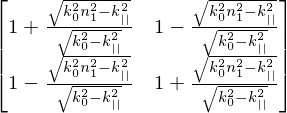

In [36]:
M0

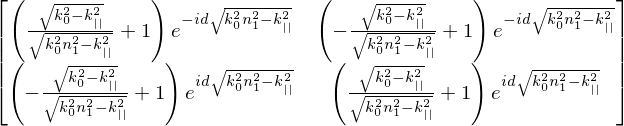

In [37]:
M1

In [38]:
M=M0*M1
M=M[0,0]
M11=M.subs([(n1,4),(c,3*10**8), (d,1)])
eq = Eq(M11,0)

In [81]:
eq1 = Eq(M.subs([(n1,4),(c,3*10**8), (d,1)]),0)

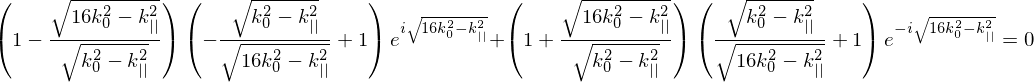

In [82]:
eq1